In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmap

In [6]:
def detect(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

    #canny
    img_canny = cv2.Canny(img,100,200)

    #sobel
    img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
    img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
    img_sobel = img_sobelx + img_sobely


    #prewitt
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    return img_prewittx+img_prewitty









# cv2.waitKey(0)
# cv2.destroyAllWindows()

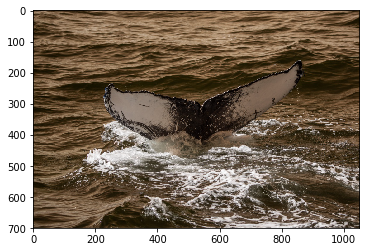

In [3]:
plt.imshow(img)

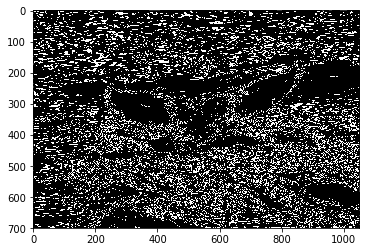

In [14]:
plt.imshow(img_canny,cmap=cmap.gray)

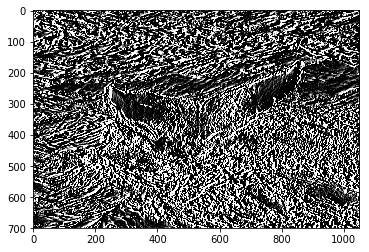

In [16]:
plt.imshow(img_sobelx,cmap=cmap.gray)

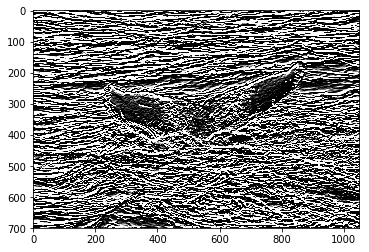

In [17]:
plt.imshow(img_sobely,cmap=camp.gray)

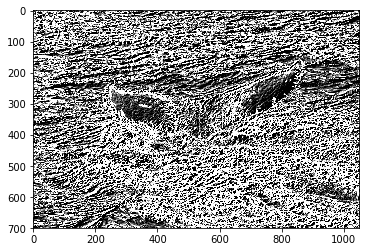

In [19]:
plt.imshow(img_sobel,cmap=camp.gray)

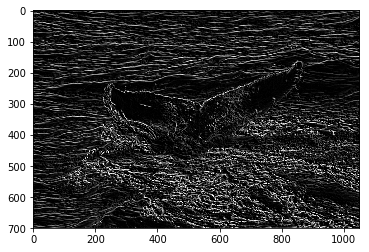

In [23]:
plt.imshow(img_prewittx + img_prewitty,cmap=cmap.gray)

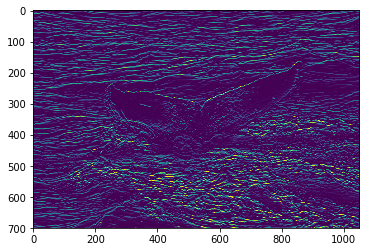

In [21]:
plt.imshow(img_prewittx)


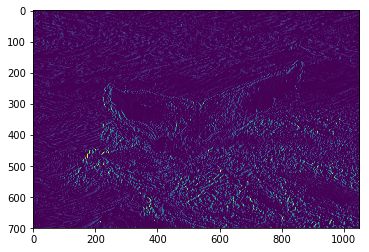

In [22]:
plt.imshow(img_prewitty)

In [4]:
import os
l = os.listdir('../kmeans')



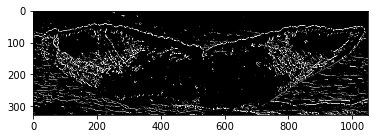

In [7]:
img = cv2.imread('../kmeans/'+l[5])
plt.imshow(detect(img),cmap=cmap.gray)


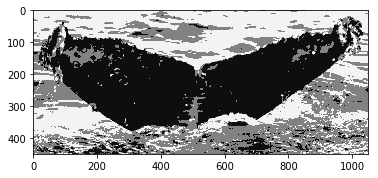

In [56]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,'gray')

In [77]:
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
# ret,thresh4 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
# ret,thresh5 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO_INV)


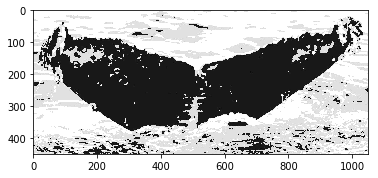

In [78]:
plt.imshow(thresh3,'gray')

In [67]:
des = cv2.bitwise_not(thresh3)
contour,hier = cv2.findContours(des,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contour:
    cv2.drawContours(des,[cnt],0,255,-1)

gray = cv2.bitwise_not(des)

ValueError: too many values to unpack (expected 2)